# EDA
- 변수 탐색
- ~ 4/13

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale=2)

# Load Data

In [ ]:
train = pd.read_csv('C:/Users/LG/Desktop/DACON/data/train.csv', index_col='index')
test = pd.read_csv('C:/Users/LG/Desktop/DACON/data/test.csv', index_col='index')
submission = pd.read_csv('C:/Users/LG/Desktop/DACON/data/sample_submission.csv')

# 데이터 파악하기
* Numerical : index, child_num, income_total, family_size
* Binary : gender, car, reality, FLAG_MOBIL, work_phone, phone, email
* Multi : incom_type, edu_type, family_type, house_type, occupy_type
* 날짜형 : DAYS_BIRTH, DAYS_EMPLOYED, begin_month

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
gender           26457 non-null object
car              26457 non-null object
reality          26457 non-null object
child_num        26457 non-null int64
income_total     26457 non-null float64
income_type      26457 non-null object
edu_type         26457 non-null object
family_type      26457 non-null object
house_type       26457 non-null object
DAYS_BIRTH       26457 non-null int64
DAYS_EMPLOYED    26457 non-null int64
FLAG_MOBIL       26457 non-null int64
work_phone       26457 non-null int64
phone            26457 non-null int64
email            26457 non-null int64
occyp_type       18286 non-null object
family_size      26457 non-null float64
begin_month      26457 non-null float64
credit           26457 non-null float64
dtypes: float64(4), int64(7), object(8)
memory usage: 3.2+ MB


In [ ]:
# credit 열의 data type을 int로 변경하고 train_y에 저장
train_y = train['credit'].astype(int)

In [ ]:
train_y[:5]

index
0    1
1    1
2    2
3    0
4    2
Name: credit, dtype: int32

## unique 확인하기
* FLAG_MOBIL 열이 모두 같은 값이므로 무의미한 정보라고 판단하여 drop해도 될 듯 하다.

In [ ]:
# train set과 test set 합치기
data = pd.concat([train, test], axis=0)

In [ ]:
# 모든 열의 요소 개수
unique_len = data.apply(lambda x: len(x.unique()))

In [ ]:
# FLAG_MOBIL의 요소 개수가 1개이므로 무의미한 정보임을 알 수 있음
unique_len

DAYS_BIRTH       7183
DAYS_EMPLOYED    3640
FLAG_MOBIL          1
begin_month        61
car                 2
child_num           9
credit              4
edu_type            5
email               2
family_size        10
family_type         5
gender              2
house_type          6
income_total      265
income_type         5
occyp_type         19
phone               2
reality             2
work_phone          2
dtype: int64

In [ ]:
# FLAG_MOBIL 열 없앰
data = data.drop('FLAG_MOBIL', axis=1)

## null data 확인
* occupy_type 열의 결측치를 어떻게 처리할지 논의해야한다.

In [ ]:
data.isnull().sum()

DAYS_BIRTH           0
DAYS_EMPLOYED        0
begin_month          0
car                  0
child_num            0
credit           10000
edu_type             0
email                0
family_size          0
family_type          0
gender               0
house_type           0
income_total         0
income_type          0
occyp_type       11323
phone                0
reality              0
work_phone           0
dtype: int64

# 반응변수 Credit 비율 확인
- credit의 값이 낮을수록 높은 신용의 신용카드 사용자이다.
- 신용이 높은 신용카드 사용자가 적다.

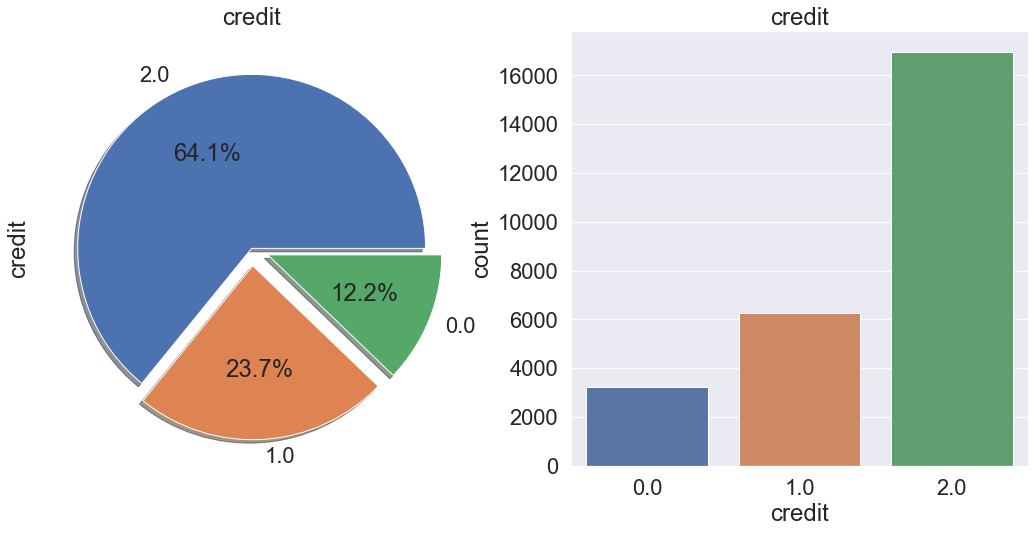

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['credit'].value_counts().plot.pie(explode=[0,0.1, 0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('credit')
ax[0].set_ylabel('credit')
sns.countplot('credit',data=data,ax=ax[1])
ax[1].set_title('credit')
plt.show()

## Binaray
* 이진변수인 gender, car, reality, work_phone, phone, email에 대해 분석
* 특이사항 발견 못함

Text(0.5, 1.0, 'reality')

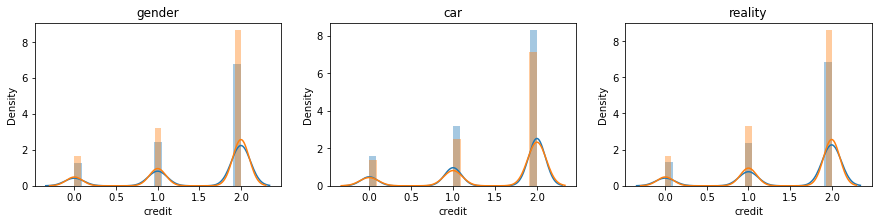

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.distplot(train_y[train['gender']=='M'], ax=axes[0])
sns.distplot(train_y[train['gender']=='F'], ax=axes[0])

sns.distplot(train_y[train['car']=='N'], ax=axes[1])
sns.distplot(train_y[train['car']=='Y'], ax=axes[1])

sns.distplot(train_y[train['reality']=='N'], ax=axes[2])
sns.distplot(train_y[train['reality']=='Y'], ax=axes[2])

axes[0].set_title('gender')
axes[1].set_title('car')
axes[2].set_title('reality')


Text(0.5, 1.0, 'email')

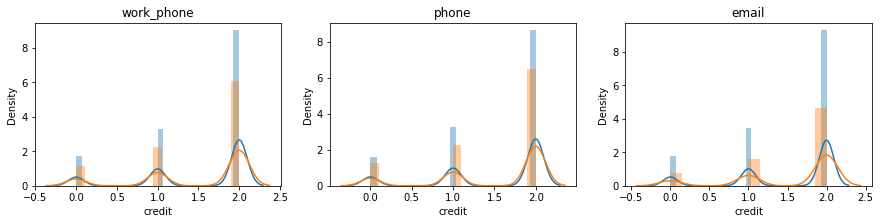

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.distplot(train_y[train['work_phone']==0], ax=axes[0])
sns.distplot(train_y[train['work_phone']==1], ax=axes[0])

sns.distplot(train_y[train['phone']==0], ax=axes[1])
sns.distplot(train_y[train['phone']==1], ax=axes[1])

sns.distplot(train_y[train['email']==0], ax=axes[2])
sns.distplot(train_y[train['email']==1], ax=axes[2])

axes[0].set_title('work_phone')
axes[1].set_title('phone')
axes[2].set_title('email')


#### gender
- 전체 데이터 비율을 보면 남성과 여성의 차이가 별로 없다.

In [ ]:
data.groupby(['gender'])['credit'].count()

NameError: ignored

In [ ]:
data.groupby(['gender', 'credit'])['credit'].count()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['gender','credit']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs gender')
sns.countplot('gender',hue='credit',data=data,ax=ax[1])
ax[1].set_title('gender:credit level')
plt.show()

#### car

In [1]:
data.groupby(['car'])['credit'].count()

NameError: ignored

In [ ]:
data.groupby(['car', 'credit'])['credit'].count()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['car','credit']].groupby(['car']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs car')
sns.countplot('car',hue='credit',data=data,ax=ax[1])
ax[1].set_title('car:credit level')
plt.show()

#### reality

In [ ]:
data.groupby(['reality'])['credit'].count()

reality
N     8627
Y    17830
Name: credit, dtype: int64

In [ ]:
data.groupby(['reality', 'credit'])['credit'].count()

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64

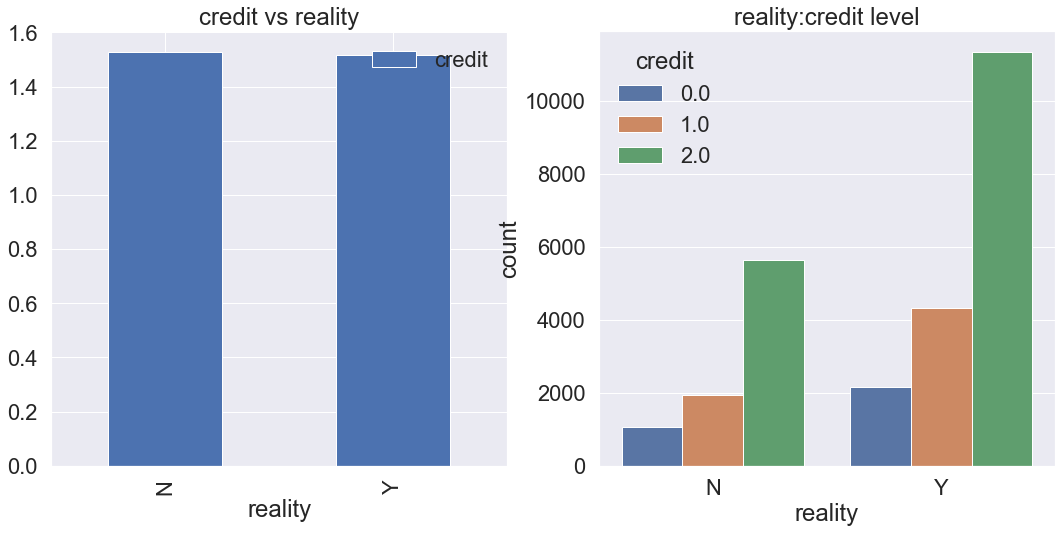

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['reality','credit']].groupby(['reality']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs reality')
sns.countplot('reality',hue='credit',data=data,ax=ax[1])
ax[1].set_title('reality:credit level')
plt.show()

#### phone

In [ ]:
data.groupby(['phone'])['credit'].count()

phone
0    18672
1     7785
Name: credit, dtype: int64

In [ ]:
data.groupby(['phone', 'credit'])['credit'].count()

phone  credit
0      0.0        2245
       1.0        4510
       2.0       11917
1      0.0         977
       1.0        1757
       2.0        5051
Name: credit, dtype: int64

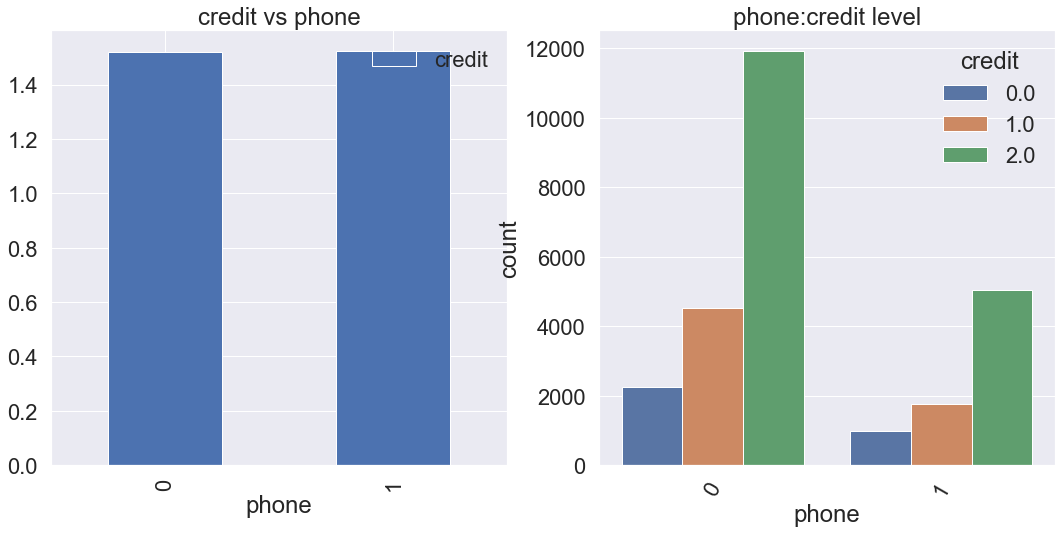

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['phone','credit']].groupby(['phone']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs phone')
sns.countplot('phone',hue='credit',data=data,ax=ax[1])
ax[1].set_title('phone:credit level')
plt.xticks(rotation=60)
plt.show()

#### email

In [ ]:
data.groupby(['email'])['credit'].count()

email
0    24042
1     2415
Name: credit, dtype: int64

In [ ]:
data.groupby(['email', 'credit'])['credit'].count()

email  credit
0      0.0        2953
       1.0        5724
       2.0       15365
1      0.0         269
       1.0         543
       2.0        1603
Name: credit, dtype: int64

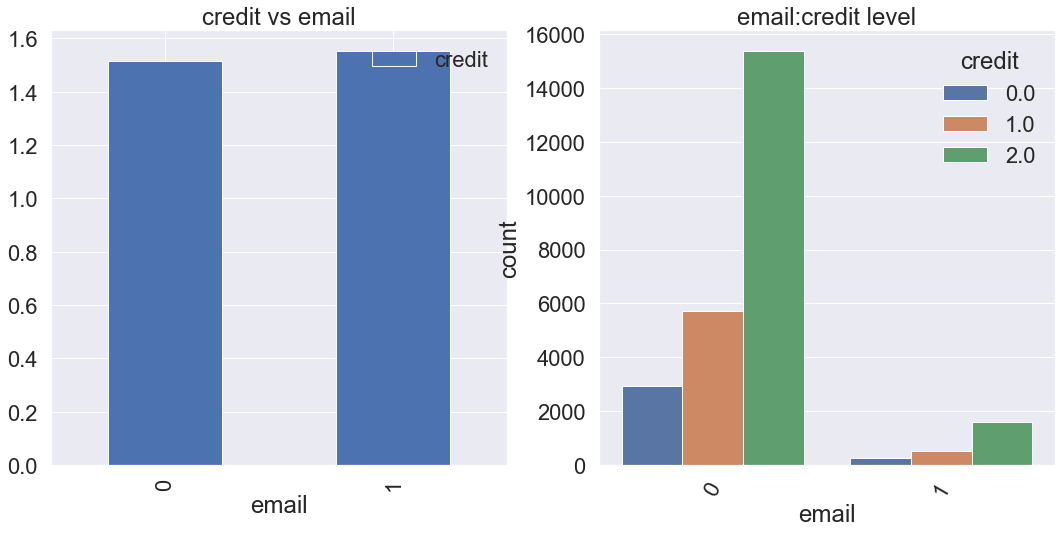

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['email','credit']].groupby(['email']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs email')
sns.countplot('email',hue='credit',data=data,ax=ax[1])
ax[1].set_title('email:credit level')
plt.xticks(rotation=60)
plt.show()

## Numerical

### child_num and family_size
- 극단적인 값(5 ++)이 있지만 두 변수 간의 차이를 보면 일정함     
- 두 변수의 차이는 [-1, 0, 1, 2]로 나타남(train / test 모두)
- 0, 음수인 경우 credit이 모두 2라는 점이 특징적
- 음수인 경우는 아이가 죽거나 아이가 독립한 경우는 ..아닐까?
- 두 변수 간 차이가 일정하므로 둘 중 하나만 사용해도 되지않을까? (모델링 시 다중공선성 문제 생길 수 있음)

1. family_size - child_num 을 해본 결과 음수가 존재한다.
2. family_size가 15, 20 등의 너무 큰 수가 존재한다.
3. 변수 간 차이가 [-1, 0, 1, 2]로 거의 유사한 차이를 가지고 있다 => 다중공선성 문제 가능성

#### child_num

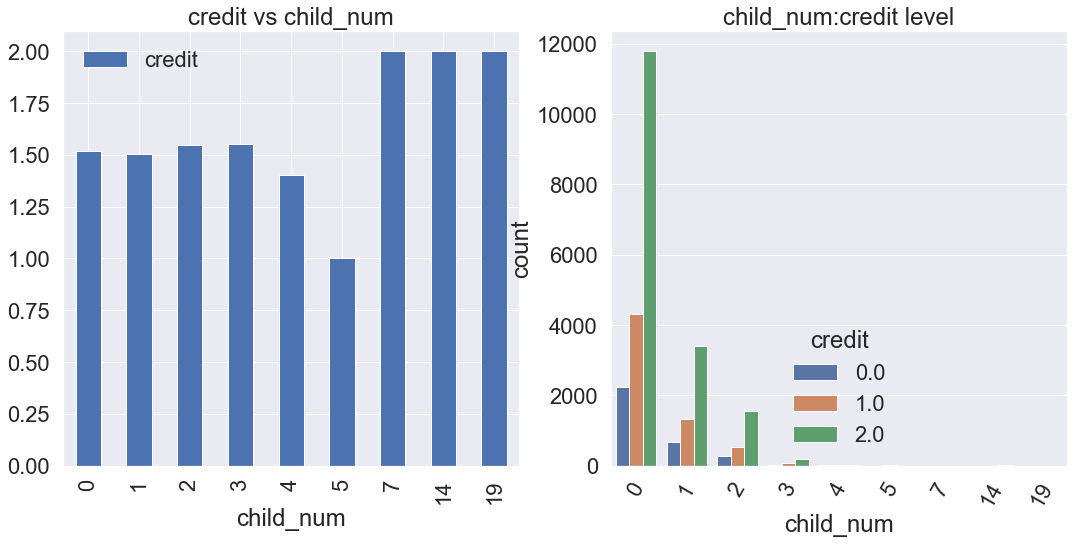

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['child_num','credit']].groupby(['child_num']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs child_num')
sns.countplot('child_num',hue='credit',data=data,ax=ax[1])
ax[1].set_title('child_num:credit level')
plt.xticks(rotation=60)
plt.show()

In [ ]:
train.groupby(['child_num'])['credit'].count()

child_num
0     18340
1      5386
2      2362
3       306
4        47
5        10
7         2
14        3
19        1
Name: credit, dtype: int64

#### family_size

In [ ]:
# 7인 가구 이상의 수가 적음
train.groupby(['family_size'])['credit'].count()

family_size
1.0      5109
2.0     14106
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
9.0         2
15.0        3
20.0        1
Name: credit, dtype: int64

In [ ]:
# test set에는 family_size가 7 이상인 경우가 없음
test.groupby(['family_size']).count()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,begin_month
family_size,,,,,,,,,,,,,,,,,
1.0,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1133,1878
2.0,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,3461,5357
3.0,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789,1460,1789
4.0,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846,695,846
5.0,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,78,106
6.0,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,12,14
7.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,10


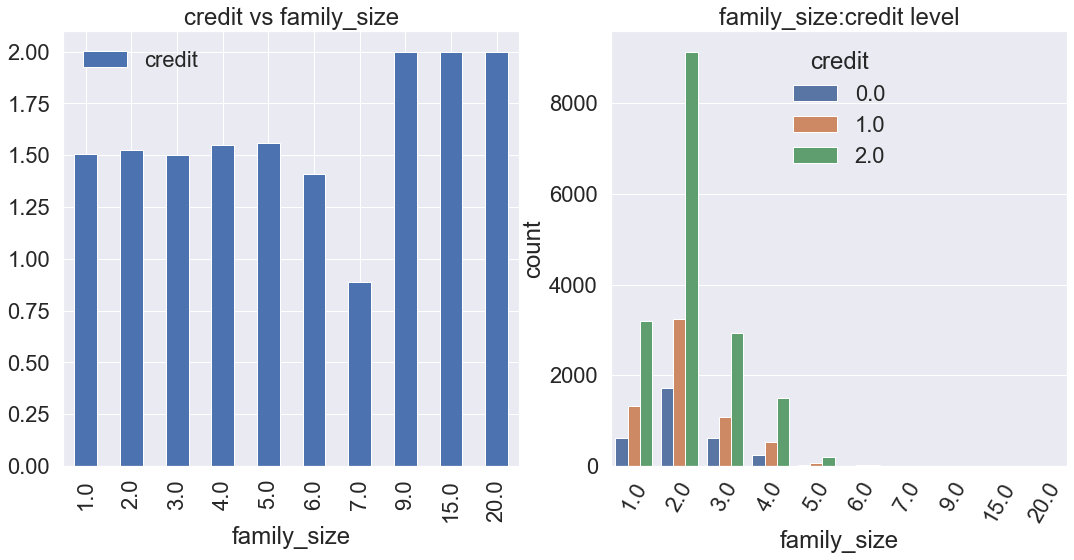

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['family_size','credit']].groupby(['family_size']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_size')
sns.countplot('family_size',hue='credit',data=data,ax=ax[1])
ax[1].set_title('family_size:credit level')
plt.xticks(rotation=60)
plt.show()

childnum unique: [ 0  1  2  3  4  5 14 19  7]
family size unique: [ 2.  3.  4.  1.  5.  6.  7. 15. 20.  9.]


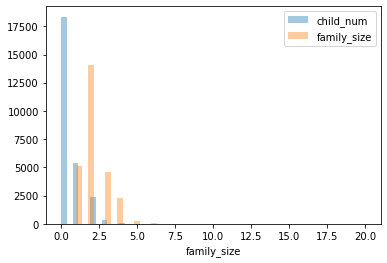

In [ ]:
print('childnum unique:', train['child_num'].unique())
print('family size unique:', train['family_size'].unique())

sns.distplot(train['child_num'], kde=False, label='child_num')
sns.distplot(train['family_size'], kde=False, label='family_size')
plt.legend()

#### child_num and family_size

<AxesSubplot:>

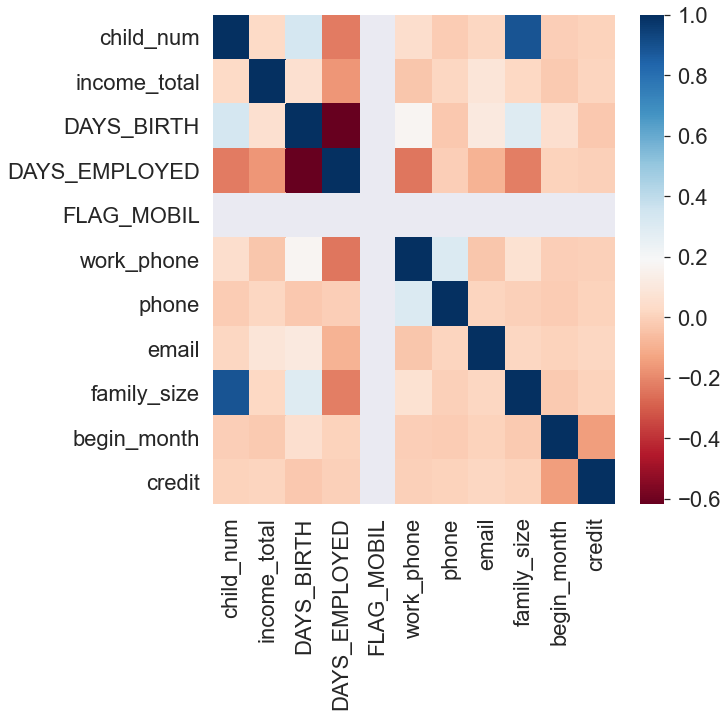

In [ ]:
# 변수별 상관도가 높음
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(9,9))
corr = train.corr()
sns.heatmap(corr,cmap='RdBu')

In [ ]:
# family_size - child_num
print('data', (data['family_size'] - data['child_num']).unique())

data [ 2.  1.  0. -1.]


In [ ]:
# 0, 음수인 경우는 credit이 모두 2
train_y[(data['family_size'] - data['child_num']).isin([0, -1])]

index
5825     2
14900    2
16110    2
16791    2
18879    2
21096    2
Name: credit, dtype: int32

In [ ]:
test[(test['family_size'] - test['child_num']).isin([0, -1])]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
31375,M,Y,N,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14452,-4249,1,0,0,0,Drivers,1.0,-35.0
34703,M,N,N,1,180000.0,Working,Secondary / secondary special,Married,House / apartment,-10656,-926,1,1,1,0,Laborers,1.0,-18.0


### Others
#### income_total
- log를 취해주면 normal dist에 가까워진다.
- 즉, credit에 따라 income_total이 크게 다르지 않을 것 같다.

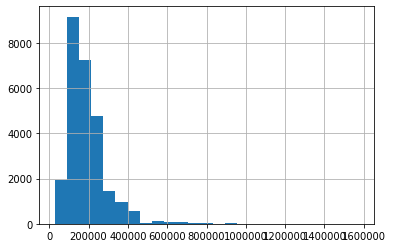

In [ ]:
train['income_total'].hist(bins=25)

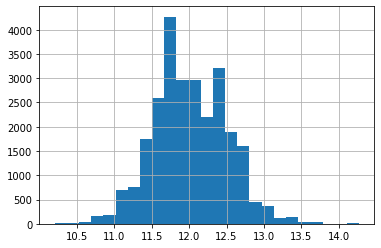

In [ ]:
# log를 취해주니 normal dist에 가까워졌다dist에 가까워졌다
train['income_total'].apply(np.log).hist(bins=25)

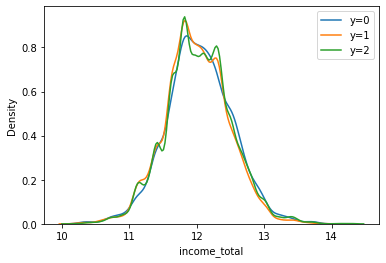

In [ ]:
# credit에 따라 소득의 분포가 크게 달라보이지 않음
sns.distplot(train['income_total'].apply(np.log)[train_y==0], label='y=0', hist=False)
sns.distplot(train['income_total'].apply(np.log)[train_y==1], label='y=1', hist=False)
sns.distplot(train['income_total'].apply(np.log)[train_y==2], label='y=2', hist=False)
plt.legend()

#### DAYS_BIRTH
- DAYS_BIRTH를 연령으로 바꾸어 나타내 봄
    - 20대 이상만 존재하며 20대 초중반의 경우 사람 수가 적지만 크게 신경 쓸 정도는 아님
    - 최소는 21세, 최고는 69세

In [ ]:
def days_to_age(x):
    return (x*-1)/365

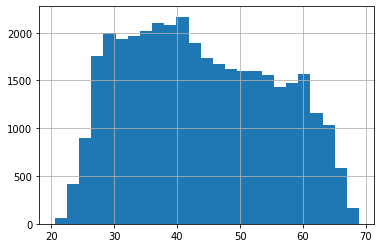

In [ ]:
data['DAYS_BIRTH'].apply(days_to_age).hist(bins=25)

In [ ]:
# 사람들의 연령 최소, 최대
print(min(data['DAYS_BIRTH'].apply(days_to_age)))
print(max(data['DAYS_BIRTH'].apply(days_to_age)))

20.517808219178082
68.90958904109588


age_groups
20's    1.496951
30's    1.501318
40's    1.538132
50's    1.529709
60's    1.532656
Name: credit, dtype: float64


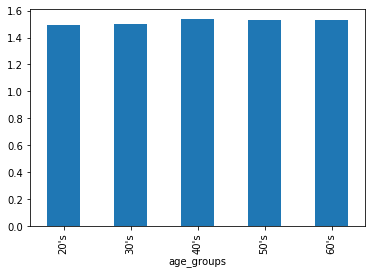

In [ ]:
# 확실히 20~30의 수가 낮은 경향이 있지만 크게 신경쓸 정도는 아닌 듯 하다.
bins = np.arange(2, 8)*10
labels = [str(s)+'\'s' for s in bins[:-1]]

df = train.copy()
df['age_groups'] = pd.cut(data['DAYS_BIRTH'].apply(days_to_age), bins, labels=labels)
print(df.groupby('age_groups').credit.mean())

df.groupby('age_groups').credit.mean().plot.bar()


#### DAYS_EMPLOYED

- DAYS_EMPLOYED의 경우 무직이 포함되어 있음
    - 로그 변환을 해주면 고용되어 있는 사람의 경우 노말하게 분포
    - 음수에 비해 양수의 수치가 너무 커서 직장이 있는 사람들의 분포를 파악하기 어렵다.
    - 양수인 수치를 0으로 변환하거나 로그변환하는 등의 전처리 과정이 필요해 보인다.
    
    - 무직자가 16% 가량으로 그 수치가 크다

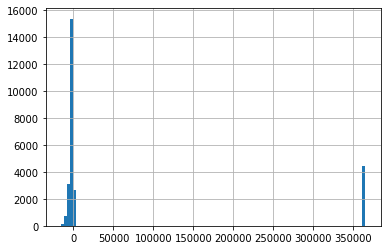

In [ ]:
# 양수는 무직자
# 음수에 비해 양수의 수치가 너무 커서 직장이 있는 사람들의 분포를 파악하기 어렵다.
# 양수를 0으로 변환하는 등의 전처리 과정이 필요해 보인다.

train['DAYS_EMPLOYED'].hist(bins=100)

In [ ]:
train.loc[(train.DAYS_EMPLOYED)>=0,'DAYS_EMPLOYED'] = 0

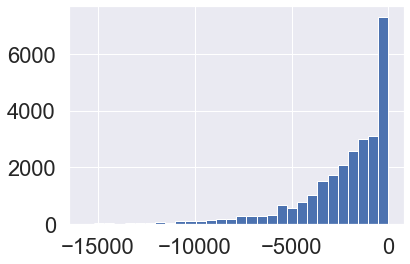

In [ ]:
train['DAYS_EMPLOYED'].hist(bins=30)

not working credit mean :  1.5141955835962144
working credit mean :  1.520641264362596


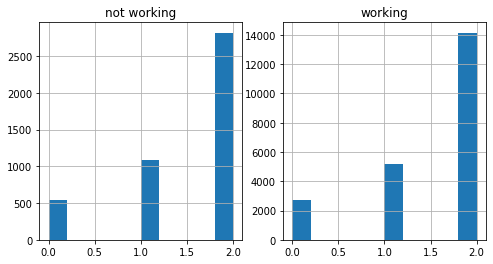

In [ ]:
# 무직자와 일하는 사람 간에 credit 차이가 거의 없다.

print('not working credit mean : ', train_y[df==0].mean())
print('working credit mean : ', train_y[df!=0].mean())

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
train_y[df==0].hist(ax=axes[0])
train_y[df!=0].hist(ax=axes[1])

axes[0].set_title('not working')
axes[1].set_title('working')
plt.show()

## Categorical

In [ ]:
def categorical_show(df, col, y_cols='credit'):
    from collections import Counter
    print('unique items:', df[col].unique())
    print()
    counter = Counter(df[col])
    print(counter)
    plt.bar(counter.keys(), counter.values())
    plt.xticks(rotation=30)
    plt.title('people in classes')
    plt.show()
    
    fig, axes = plt.subplots(1, len(df[col].unique()), figsize=(16, 4))

    for i, w in enumerate(df[col].unique()):
        axes[i].hist(df[y_cols][df[col]==w], bins=3, color='dimgray',  rwidth=0.8)
        axes[i].set_title(w)
    plt.show()


#### income_type
- income_type의 경우에도 대부분 비슷한 것을 보여줌
- student의 경우 7경우 밖에 되지 않음(test의 경우는 4)    
- income_type을 제외한 변수들은 1~2개 class에 대부분의 값이 몰려 있는 것을 알 수 있음

unique items: ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']

Counter({'Working': 13645, 'Commercial associate': 6202, 'Pensioner': 4449, 'State servant': 2154, 'Student': 7})


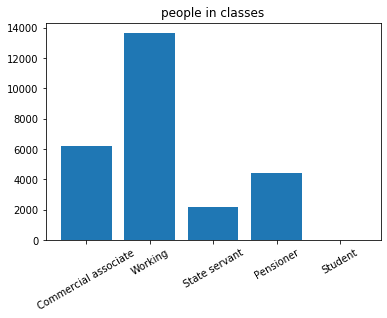

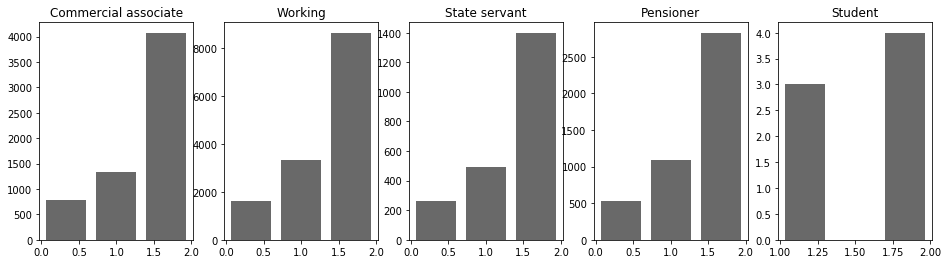

In [ ]:
categorical_show(train, 'income_type')

In [ ]:
def group_by_mean(df, col):
    print(train.groupby(col).credit.mean())
    train.groupby(col).credit.mean().plot.bar()
    plt.title('mean credit')
    plt.show()

income_type
Commercial associate    1.531119
Pensioner               1.515397
State servant           1.526927
Student                 1.571429
Working                 1.514474
Name: credit, dtype: float64


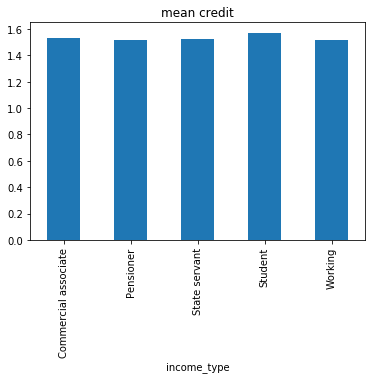

In [ ]:
group_by_mean(train, 'income_type')

#### edu_type

unique items: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Counter({'Secondary / secondary special': 17995, 'Higher education': 7162, 'Incomplete higher': 1020, 'Lower secondary': 257, 'Academic degree': 23})


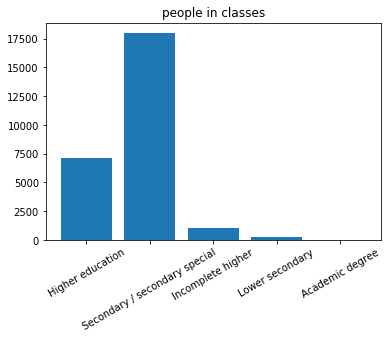

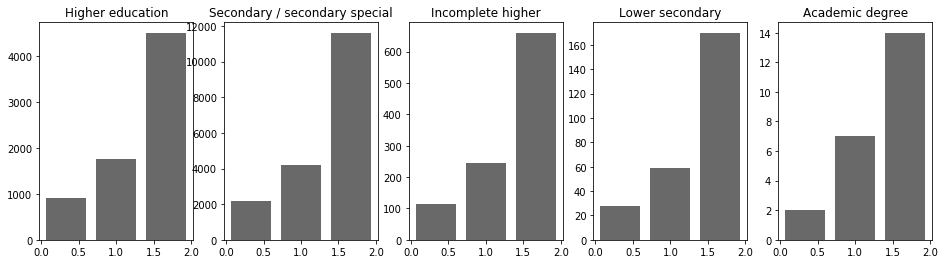

In [ ]:
# Academic degree의 경우 샘플수가 많이 적다.
categorical_show(train, 'edu_type')

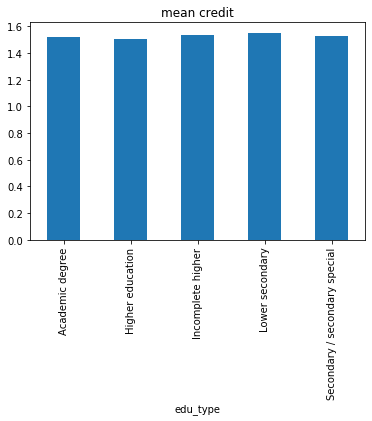

edu_type
Academic degree                  1.521739
Higher education                 1.501676
Incomplete higher                1.535294
Lower secondary                  1.552529
Secondary / secondary special    1.525313
Name: credit, dtype: float64


In [ ]:
train.groupby('edu_type').credit.mean().plot.bar()
plt.title('mean credit')
plt.show()
print(train.groupby('edu_type').credit.mean())

#### family_type

unique items: ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']

Counter({'Married': 18196, 'Single / not married': 3496, 'Civil marriage': 2123, 'Separated': 1539, 'Widow': 1103})


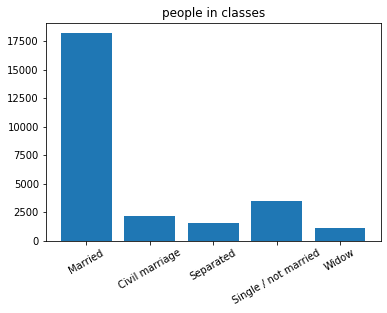

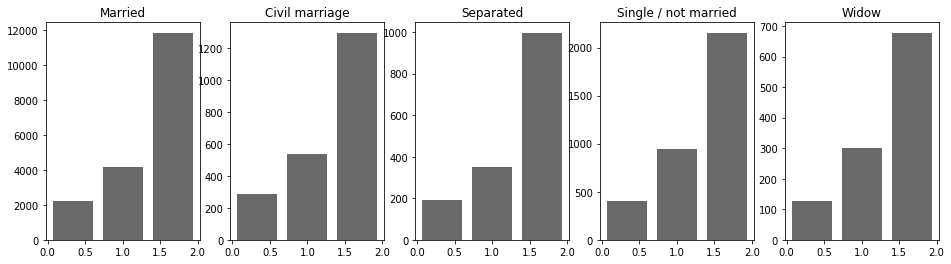

In [ ]:
# 다수가 기혼
categorical_show(train, 'family_type')

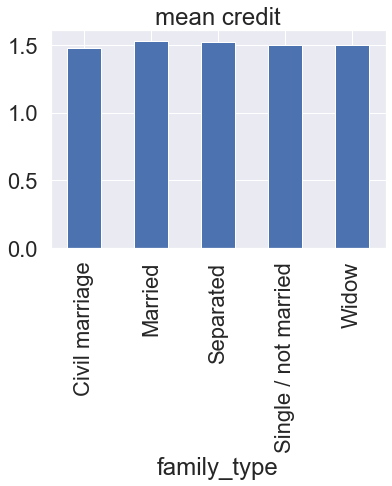

family_type
Civil marriage          1.474800
Married                 1.529237
Separated               1.522417
Single / not married    1.501144
Widow                   1.500453
Name: credit, dtype: float64


In [ ]:
train.groupby('family_type').credit.mean().plot.bar()
plt.title('mean credit')
plt.show()
print(train.groupby('family_type').credit.mean())

#### house_type

unique items: ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']

Counter({'House / apartment': 23653, 'With parents': 1257, 'Municipal apartment': 818, 'Rented apartment': 429, 'Office apartment': 190, 'Co-op apartment': 110})


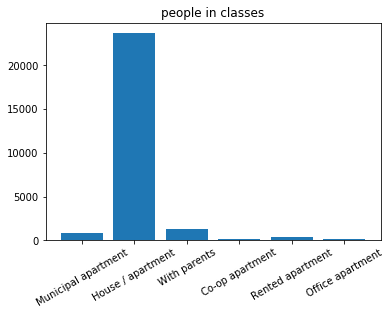

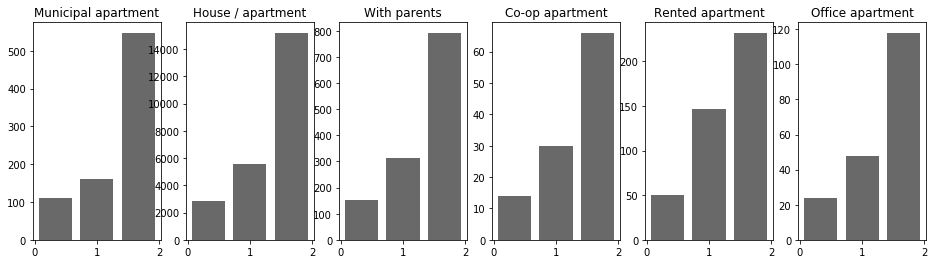

In [ ]:
# 대부분이 하우스/아파트
# 일부 class는 샘플수가 크게 적어 보임
categorical_show(train, 'house_type')

#### occyp_type
- null 값이 많아 전처리가 필요

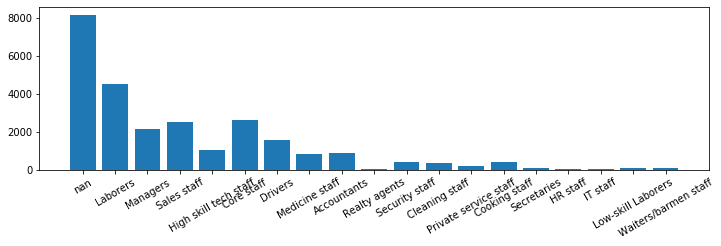

,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,nan
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.034093,0.015232,0.017273,0.100011,0.059531,0.002343,0.039309,0.001550,0.170541,0.004800,0.081906,0.032657,0.009185,0.002381,0.095967,0.003666,0.016026,0.004687,0.308841
std,0.181472,0.122478,0.130290,0.300021,0.236620,0.048353,0.194333,0.039336,0.376114,0.069119,0.274227,0.177740,0.095398,0.048741,0.294552,0.060440,0.125578,0.068301,0.462024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 직업을 기입하지 않은 경우가 30%

plt.figure(figsize=(12, 3))
counter = Counter(train.replace(np.nan, 'nan')['occyp_type'])
plt.bar(counter.keys(), counter.values())
plt.xticks(rotation=30)
plt.show()

pd.get_dummies(train.replace(np.nan, 'nan')['occyp_type']).describe()

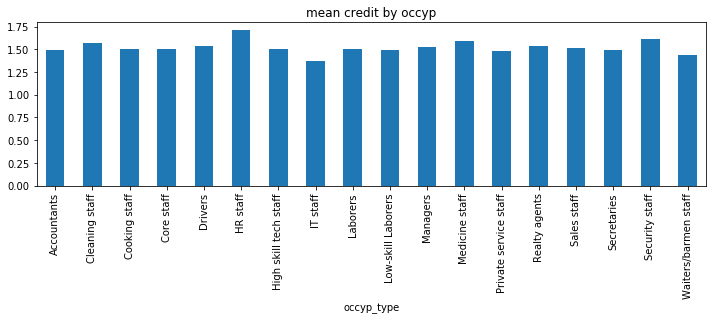

occyp_type
Accountants              1.486696
Cleaning staff           1.570720
Cooking staff            1.505470
Core staff               1.502646
Drivers                  1.535238
HR staff                 1.709677
High skill tech staff    1.503846
IT staff                 1.365854
Laborers                 1.500443
Low-skill Laborers       1.488189
Managers                 1.530226
Medicine staff           1.586806
Private service staff    1.485597
Realty agents            1.539683
Sales staff              1.513194
Secretaries              1.494845
Security staff           1.608491
Waiters/barmen staff     1.435484
Name: credit, dtype: float64


In [ ]:
plt.figure(figsize=(12, 3))
train.groupby('occyp_type').credit.mean().plot.bar()
plt.title('mean credit by occyp')
plt.show()

print(train.groupby('occyp_type').credit.mean())